In [6]:
# Link to the data set : https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-07-02

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DULZZ\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
file_path = 'media_franchises.csv'
franchise_data = pd.read_csv(file_path)

In [17]:
franchise_data

,franchise,revenue_category,revenue,year_created,original_media,creators,owners
0,A Song of Ice and Fire / Game of Thrones,Book sales,0.900,1996,Novel,George R. R. Martin,Random House WarnerMedia (AT&T)
1,A Song of Ice and Fire / Game of Thrones,Box Office,0.001,1996,Novel,George R. R. Martin,Random House WarnerMedia (AT&T)
2,A Song of Ice and Fire / Game of Thrones,Home Video/Entertainment,0.280,1996,Novel,George R. R. Martin,Random House WarnerMedia (AT&T)
3,A Song of Ice and Fire / Game of Thrones,TV,4.000,1996,Novel,George R. R. Martin,Random House WarnerMedia (AT&T)
4,A Song of Ice and Fire / Game of Thrones,Video Games/Games,0.132,1996,Novel,George R. R. Martin,Random House WarnerMedia (AT&T)
...,...,...,...,...,...,...,...
316,Yo-kai Watch,Video Games/Games,0.825,2013,Video game,Level-5,Level-5 Nintendo
317,Yu-Gi-Oh!,Box Office,0.042,1996,Manga,Kazuki Takahashi,Shueisha (Hitotsubashi Group) Konami (games)
318,Yu-Gi-Oh!,Comic or Manga,3.196,1996,Manga,Kazuki Takahashi,Shueisha (Hitotsubashi Group) Konami (games)
319,Yu-Gi-Oh!,"Merchandise, Licensing & Retail",4.000,1996,Manga,Kazuki Takahashi,Shueisha (Hitotsubashi Group) Konami (games)


#  Plot 1: Top Franchises by Total Revenue

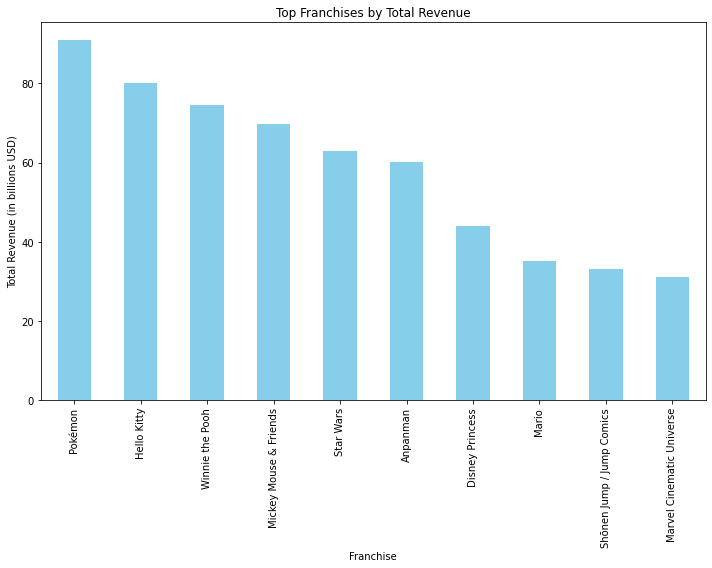

In [34]:
# Aggregate total revenue per franchise
total_revenue = franchise_data.groupby('franchise')['revenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 8))
total_revenue.plot(kind='bar', color='skyblue')
plt.title('Top Franchises by Total Revenue')
plt.xlabel('Franchise')
plt.ylabel('Total Revenue (in billions USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### This plot will show the top 10 franchises based on their total revenue across all categories

# Plot 2: Distribution of Revenue by Category

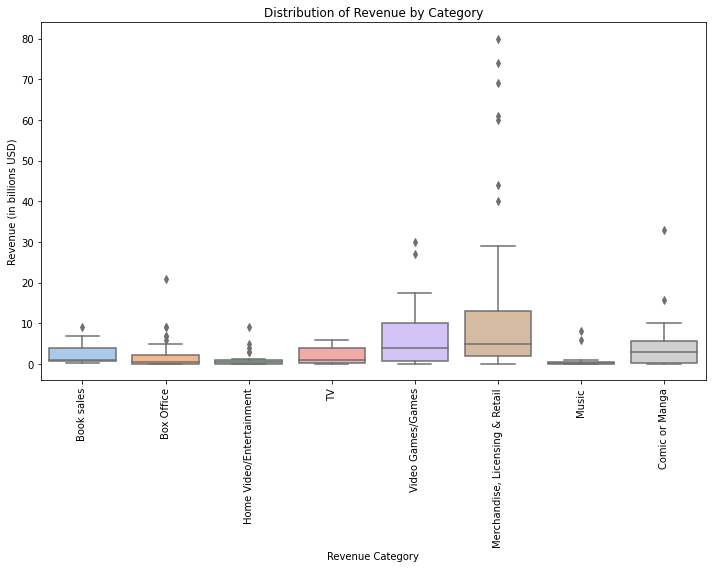

In [32]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='revenue_category', y='revenue', data=franchise_data, palette='pastel')
plt.title('Distribution of Revenue by Category')
plt.xlabel('Revenue Category')
plt.ylabel('Revenue (in billions USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### This plot will displays the revenue distribution across different revenue categories.

# Plot 3: Relationship between Revenue and Year Created

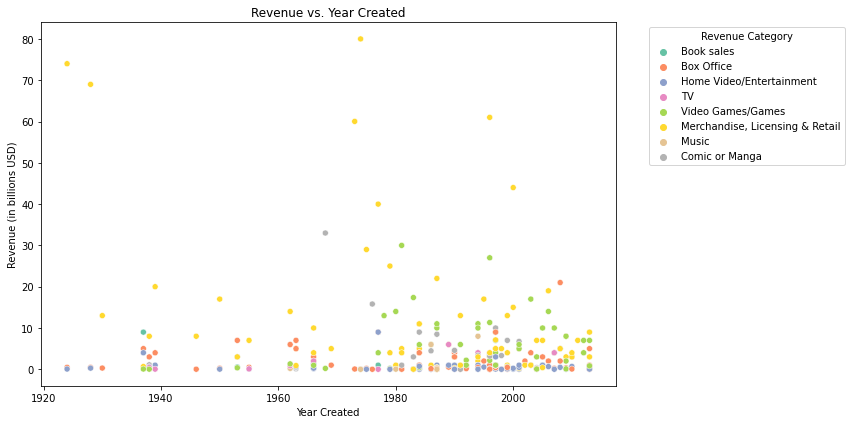

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year_created', y='revenue', data=franchise_data, hue='revenue_category', palette='Set2')
plt.title('Revenue vs. Year Created')
plt.xlabel('Year Created')
plt.ylabel('Revenue (in billions USD)')
plt.legend(title='Revenue Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### This plot will explore the relationship between the year a franchise was created and its revenue.

# Plot 4: Count of Franchises by Original Media Source

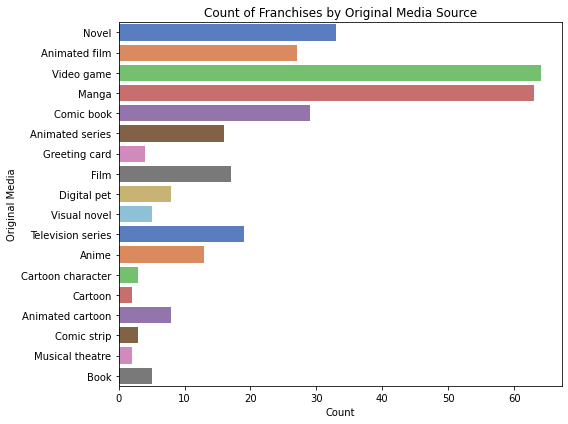

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(y='original_media', data=franchise_data, palette='muted')
plt.title('Count of Franchises by Original Media Source')
plt.xlabel('Count')
plt.ylabel('Original Media')
plt.tight_layout()
plt.show()

### This plote will Illustrate the count of franchises originating from various media sources.

# Plot 5: Ownership Distribution of Top Franchises

C:\Users\DULZZ\AppData\Local\Temp\ipykernel_19304\3109822109.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 720x432 with 0 Axes>

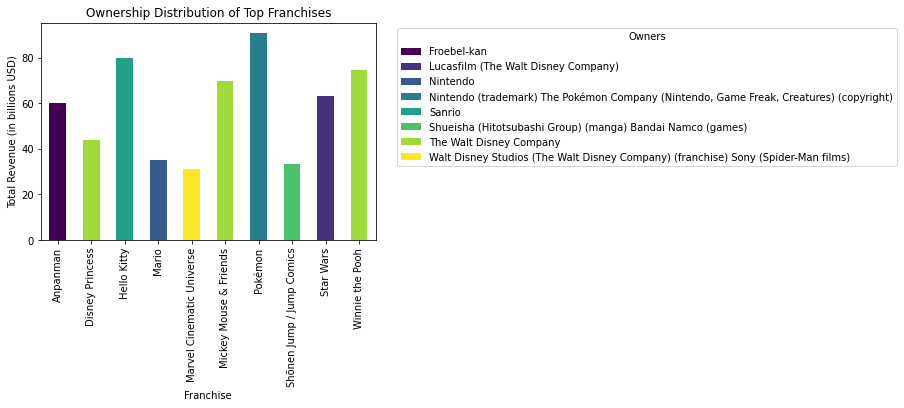

In [84]:
# Select top franchises based on total revenue
top_franchises = total_revenue.index

# Filter data for top franchises
top_franchise_data = franchise_data[franchise_data['franchise'].isin(top_franchises)]

# Create a pivot table for stacked bar plot
pivot_owners = top_franchise_data.pivot_table(index='franchise', columns='owners', values='revenue', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
pivot_owners.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Ownership Distribution of Top Franchises')
plt.xlabel('Franchise')
plt.ylabel('Total Revenue (in billions USD)')
plt.legend(title='Owners', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### This plot will represents the ownership distribution among different owners for the top 10 revenue-generating franchises.